# Problem Set 3
This problem set is based on lectures 9 and 10. For a complete list of topics please 
consult page 2 of the course syllabus. Please consult the “Instructions for Problem 
Set Submissions” document under course information before submitting your 
assignment.

# Question 1

In [3]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address. 
# Step 3. Assign it to a variable called users
import pandas as pd

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

users = pd.read_csv(url, delimiter='|')

print(users)



     user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]


In [4]:
# Step 4. Discover what is the mean age per occupation

mean_age_per_occupation = users.groupby('occupation')['age'].mean()

print(mean_age_per_occupation)


occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [5]:
# Step 5. Discover the Male ratio per occupation and sort it from the most to the least 

male_ratio_per_occupation = users[users['gender']=='M'].groupby('occupation')['gender'].count() / users.groupby('occupation')['gender'].count()

male_ratio_per_occupation = male_ratio_per_occupation.sort_values(ascending=False)

print(male_ratio_per_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender, dtype: float64


In [6]:
# Step 6. For each occupation, calculate the minimum and maximum ages

minmax_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(minmax_age_per_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


In [7]:
# Step 7. For each combination of occupation and sex, calculate the mean age 

mean_age_per_occupation_and_sex = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_per_occupation_and_sex)


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

In [13]:
# Step 8. For each occupation present the percentage of women and men

gender_count_per_occupation = users.groupby(['occupation', 'gender']).size().unstack(fill_value=0)
gender_percentage_per_occupation = gender_count_per_occupation.apply(lambda x: x / x.sum() * 100, axis=1)
# print(gender_count_per_occupation)
print(gender_percentage_per_occupation)

gender                 F           M
occupation                          
administrator  45.569620   54.430380
artist         46.428571   53.571429
doctor          0.000000  100.000000
educator       27.368421   72.631579
engineer        2.985075   97.014925
entertainment  11.111111   88.888889
executive       9.375000   90.625000
healthcare     68.750000   31.250000
homemaker      85.714286   14.285714
lawyer         16.666667   83.333333
librarian      56.862745   43.137255
marketing      38.461538   61.538462
none           44.444444   55.555556
other          34.285714   65.714286
programmer      9.090909   90.909091
retired         7.142857   92.857143
salesman       25.000000   75.000000
scientist       9.677419   90.322581
student        30.612245   69.387755
technician      3.703704   96.296296
writer         42.222222   57.777778


# Question 2



In [15]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address
# Step 3. Assign it to a variable called euro12 
import pandas as pd
url1 = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv"
euro12 = pd.read_csv(url1,delimiter=',')
print(euro12.head())

             Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
0         Croatia      4               13                12             51.9%   
1  Czech Republic      4               13                18             41.9%   
2         Denmark      4               10                10             50.0%   
3         England      5               11                18             50.0%   
4          France      3               22                24             37.9%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
0            16.0%                          32             0              0   
1            12.9%                          39             0              0   
2            20.0%                          27             1              0   
3            17.2%                          40             0              0   
4             6.5%                          65             1              0   

   Penalties not scored  ...  Saves ma

In [18]:
# Step 4. Select only the Goal column

goal_column = euro12['Goals']
print(goal_column)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


In [20]:
# Step 5. How many team participated in the Euro2012? 

num_teams = len(euro12)
print("Number of teams that  participated in Euro2012:", num_teams)


Number of teams that  participated in Euro2012: 16


In [21]:
# Step 6. What is the number of columns in the dataset?
num_columns = len(euro12.columns)
print("Number of columns in the dataset:", num_columns)


Number of columns in the dataset: 35


In [22]:
# Step 7. View only the columns Team, Yellow Cards and Red Cards and assign them 
# to a dataframe called discipline

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)


                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


In [44]:
# Step 8. Sort the teams by Red Cards, then to Yellow Cards 

sorted_red_yellow = discipline.sort_values(['Red Cards','Yellow Cards'])
print(sorted_red_yellow)

                   Team  Yellow Cards  Red Cards
2               Denmark             4          0
5               Germany             4          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
4                France             6          0
12               Russia             6          0
1        Czech Republic             7          0
14               Sweden             7          0
0               Croatia             9          0
13                Spain            11          0
10             Portugal            12          0
7                 Italy            16          0
11  Republic of Ireland             6          1
9                Poland             7          1
6                Greece             9          1


In [52]:
# Step 9. Calculate the mean Yellow Cards given per Team

mean_yellow = sorted_red_yellow['Yellow Cards'].mean()
print(mean_yellow)


7.4375


In [55]:
# Step 10. Filter teams that scored more than 6 goals
more_than_6 = euro12[euro12['Goals'] > 6]['Team']
print(more_than_6)

5     Germany
13      Spain
Name: Team, dtype: object


In [58]:
# Step 12. Select the first 7 columns

first_7 = euro12.iloc[:,:7]
print(first_7)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [60]:
# Step 13. Select all columns except the last 3

column_except_last_3 = euro12.iloc[:,:-3]
print(column_except_last_3)

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

In [61]:
# Step 14. Present only the Shooting Accuracy from England, Italy and Russia
selected_teams = ['England', 'Italy', 'Russia']
shooting_accuracy = euro12.loc[euro12['Team'].isin(selected_teams), ['Team', 'Shooting Accuracy']]
print(shooting_accuracy)


       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


# Question 3
Housing

In [67]:
# Step 1. Import the necessary libraries
# Step 2. Create 3 differents Series, each of length 100, as follows:
# • The first a random number from 1 to 4
# • The second a random number from 1 to 3
# • The third a random number from 10,000 to 30,000 
import pandas as pd
import numpy as np

series1 = pd.Series(np.random.randint(1, 5, size=100))

series2 = pd.Series(np.random.randint(1, 4, size=100))

series3 = pd.Series(np.random.randint(10000, 30001, size=100))

# print(series1)
# print(series2)
# print(series3)


0     2
1     4
2     3
3     2
4     2
     ..
95    4
96    2
97    4
98    4
99    2
Length: 100, dtype: int32


In [173]:
# Step 3. Create a DataFrame by joinning the Series by column
df = pd.concat({'Series 1': series1, 'Series 2': series2, 'Series 3': series3}, axis=1)
print(df.head(2))


   Series 1  Series 2  Series 3
0         2         3     23198
1         4         2     29826


In [174]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df)

    bedrs  bathrs  price_sqr_meter
0       2       3            23198
1       4       2            29826
2       3       2            15618
3       2       2            19010
4       2       3            16828
..    ...     ...              ...
95      4       1            12968
96      2       1            12470
97      4       1            22024
98      4       1            17058
99      2       1            29456

[100 rows x 3 columns]


In [176]:
bigcolumn = pd.DataFrame(pd.concat([series1, series2, series3], axis=0))
print(bigcolumn)

        0
0       2
1       4
2       3
3       2
4       2
..    ...
95  12968
96  12470
97  22024
98  17058
99  29456

[300 rows x 1 columns]


In [177]:
# Step 6. Ops it seems it is going only until index 99. Is it true? 

# Yes, it's true. Since the length of each series is 100, the index of the DataFrame will also go up to 99, which is the maximum index value.

In [179]:
# Step 7. Reindex the DataFrame so it goes from 0 to 299
df = df.reindex(range(300)).fillna(0)
print(df)

     bedrs  bathrs  price_sqr_meter
0      2.0     3.0          23198.0
1      4.0     2.0          29826.0
2      3.0     2.0          15618.0
3      2.0     2.0          19010.0
4      2.0     3.0          16828.0
..     ...     ...              ...
295    0.0     0.0              0.0
296    0.0     0.0              0.0
297    0.0     0.0              0.0
298    0.0     0.0              0.0
299    0.0     0.0              0.0

[300 rows x 3 columns]


# Question 4
Wind Statistics
The data have been modified to contain some missing values, identified by NaN. 
Using pandas should make this exercise easier, in particular for the bonus question.
You should be able to perform all of these operations without using a for loop or 
other looping construct.
The data in 'wind.data' has the following format

In [21]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from the attached file wind.txt
# Step 3. Assign it to a variable called data and replace the first 3 columns by a proper 
# datetime index
import pandas as pd

data = pd.read_csv("wind.txt", delim_whitespace=True, na_values="0")


data["Date"] = pd.to_datetime(data["Yr"].astype(str) + "-" + data["Mo"].astype(str) + "-" + data["Dy"].astype(str), format="%y-%m-%d")
data.drop(["Yr", "Mo", "Dy"], axis=1, inplace=True)
data.set_index("Date", inplace=True)
print(data)
    

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
2061-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
2061-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [26]:
# Step 4. Year 2061? Do we really have data from this year? Create a function to fix it 
# and apply it.
import pandas as pd

def fixing_year(x):
    if x.year > 2000:
        year = x.year - 100
    else:
        year = x.year
    return pd.Timestamp(year=year, month=x.month, day=x.day)

data.index = data.index.map(fix_year)
print(data)

              RPT    VAL    ROS    KIL    SHA    BIR    DUB    CLA    MUL  \
Date                                                                        
1961-01-01  15.04  14.96  13.17   9.29    NaN   9.87  13.67  10.25  10.83   
1961-01-02  14.71    NaN  10.83   6.50  12.62   7.67  11.50  10.04   9.79   
1961-01-03  18.50  16.88  12.33  10.13  11.17   6.17  11.25    NaN   8.50   
1961-01-04  10.58   6.63  11.75   4.58   4.54   2.88   8.63   1.79   5.83   
1961-01-05  13.33  13.25  11.42   6.17  10.71   8.21  11.92   6.54  10.92   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
1978-12-27  17.58  16.96  17.62   8.08  13.21  11.67  14.46  15.59  14.04   
1978-12-28  13.21   5.46  13.46   5.00   8.12   9.42  14.33  16.25  15.25   
1978-12-29  14.00  10.29  14.42   8.71   9.71  10.54  19.17  12.46  14.50   
1978-12-30  18.50  14.04  21.29   9.13  12.75   9.71  18.08  12.87  12.46   
1978-12-31  20.33  17.41  27.29   9.59  12.08  10.13  19.25  11.63  11.58   

In [29]:
# Step 5. Set the right dates as the index. Pay attention at the data type, it should be 
# datetime64[ns].
data.index = pd.to_datetime(data.index)
print(data.index)

DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '1978-12-22', '1978-12-23', '1978-12-24', '1978-12-25',
               '1978-12-26', '1978-12-27', '1978-12-28', '1978-12-29',
               '1978-12-30', '1978-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


In [31]:
# Step 6. Compute how many values are missing for each location over the entire 
# record.They should be ignored in all calculations below

missing_values_count = data.isna().sum()
print(missing_values_count)


RPT    6
VAL    3
ROS    2
KIL    6
SHA    2
BIR    7
DUB    4
CLA    8
MUL    4
CLO    1
BEL    0
MAL    4
dtype: int64


In [32]:
# Step 7. Compute how many non-missing values there are in total.
total_count = data.notna().sum().sum()
print("Total non-missing values count:")
print(total_count)

Total non-missing values count:
78841


In [33]:
# Step 8. Calculate the mean windspeeds of the windspeeds over all the locations and 
# all the times.
mean_windspeed = data.mean().mean()
print("Mean windspeed over all locations and all times: ", mean_windspeed)

Mean windspeed over all locations and all times:  10.22957126433918


In [36]:
# Step 9. Create a DataFrame called loc_stats and calculate the min, max and mean 
# windspeeds and standard deviations of the windspeeds at each location over all the 
# days
# A different set of numbers for each location.

loc_stats = data.agg(['min', 'max', 'mean', 'std']).transpose()
print(loc_stats)

      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.08  28.46   6.307428  3.605246
SHA  0.13  37.54  10.455834  4.936125
BIR  0.04  26.16   7.099814  3.964033
DUB  0.21  30.37   9.798834  4.976465
CLA  0.04  31.08   8.502816  4.494166
MUL  0.17  25.88   8.494883  4.165872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [46]:
#Step 10. Create a DataFrame called day_stats and calculate the min, max and mean 
# windspeed and standard deviations of the windspeeds across all the locations at each 
# day
days_stats = data.agg(['min', 'max', 'mean', 'std'], axis=1)
print(days_stats)


             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356
...          ...    ...        ...       ...
1978-12-27  8.08  40.08  16.708333  7.868076
1978-12-28  5.00  41.46  15.150000  9.687857
1978-12-29  8.71  29.58  14.890000  5.756836
1978-12-30  9.13  28.79  15.367500  5.540437
1978-12-31  9.59  27.29  15.402500  5.702483

[6574 rows x 4 columns]


In [47]:
# Step 11. Find the average windspeed in January for each location. 

january_data = data[data.index.month == 1]

january_means = january_data.mean()

print("Average windspeed in January for each location:\n")
print(january_means)


Average windspeed in January for each location:

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.563556
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


# Question 5


In [41]:
# Step 1. Import the necessary libraries
# Step 2. Import the dataset from this address. 
# Step 3. Assign it to a variable called chipo.
import pandas as pd

url2 ='https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
chipo = pd.read_csv(url2,delimiter='\t')


In [181]:
# Step 4. See the first 10 entries
print(chipo.head(10))


   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [183]:

# Step 5. What is the number of observations in the dataset? 
print("The number of observation is:")
print(chipo.shape[0])

The number of observation is:
4622


In [184]:
# Step 6. What is the number of columns in the dataset?

number_of_columns = len(chipo.columns)
print(number_of_columns)
# can use any

# print(chipo.shape[1])

5


In [185]:
# Step 7. Print the name of all the columns. 
print(chipo.columns)


Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')


In [186]:
# Step 8. How is the dataset indexed?
# The dataset is indexed with the default indexing starting from 0


In [188]:
# Step 9. Which was the most-ordered item?
# Step 10. For the most-ordered item, how many items were ordered

most_ordered_item_qty = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()

print("The most-ordered item is:", most_ordered_item)
print("The number of orders for the most-ordered item is:", most_ordered_item_qty)



The most-ordered item is: Chicken Bowl
The number of orders for the most-ordered item is: 761


In [189]:
# Step 11. What was the most ordered item in the choice_description column? 
choice_items = chipo.groupby('choice_description').sum()

choice_items = choice_items.sort_values('quantity', ascending=False).index[0]

# print the most ordered item
print(choice_items)


[Diet Coke]


In [201]:

# Step 12. How many items were orderd in total?
total_items_ordered = chipo['quantity'].sum()
print("Total items ordered:", total_items_ordered)



Total items ordered: 4972


In [191]:
# Step 13.
# • Turn the item price into a float
# • Check the item price type
# • Create a lambda function and change the type of item price
# • Check the item price type

chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x[1:]))

print(chipo['item_price'].dtype)


float64


In [192]:
# Step 14. How much was the revenue for the period in the dataset? 
chipo['revenue'] = chipo['quantity'] * chipo['item_price']

total_revenue = chipo['revenue'].sum()

Step 15. How many orders were made in the period?
print('Total revenue for the period: $', round(total_revenue, 2))

Total revenue for the period: $ 39237.02


In [195]:
# Step 15. How many orders were made in the period?

num_orders = chipo['order_id'].nunique()
print("Number of orders:", num_orders)


Number of orders: 1834


In [196]:
# Step 16. What is the average revenue amount per order? 
avg_revenue = revenue / num_orders

print("The average revenue per order is: $", round(avg_revenue, 2))


The average revenue per order is: $ 1.43


In [42]:
# Step 17. How many different items are sold?
num_items_sold = chipo['item_name'].nunique()
print(num_items_sold)



50


# Question 6
Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend. 
Don't forget to label your axes!

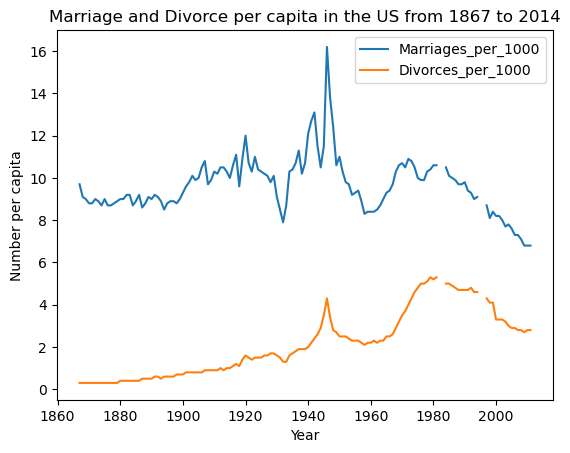

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

us_stat = pd.read_csv('us-marriages-divorces-1867-2014.csv')

columns = ['Marriages_per_1000', 'Divorces_per_1000']

x_data = us_stat['Year']

fig, ax = plt.subplots()

for column in columns:
    ax.plot(x_data, us_stat[column], label=column)

ax.set_title('Marriage and Divorce per capita in the US from 1867 to 2014')
ax.legend()

ax.set_xlabel('Year')
ax.set_ylabel('Number per capita')

plt.show()


# Question 7
Create a vertical bar chart comparing the number of marriages and divorces per 
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

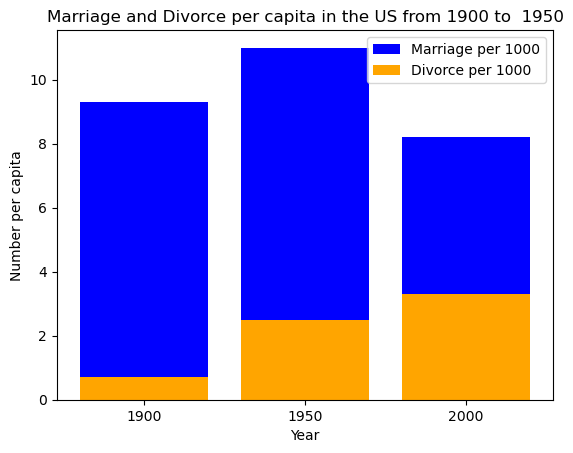

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

us_stat2 = pd.read_csv('us-marriages-divorces-1867-2014.csv')
us_stat2 = us_stat2[us_stat2['Year'].isin([1900, 1950, 2000])]

# set color scheme
colors = ['#0000FF', '#FFA500']

# create a bar chart
plt.bar(['1900', '1950', '2000'], us_stat2['Marriages_per_1000'], color=colors[0], label='Marriage per 1000')
plt.bar(['1900', '1950', '2000'], us_stat2['Divorces_per_1000'], color=colors[1], label='Divorce per 1000')

plt.xlabel('Year')
plt.ylabel('Number per capita')
plt.title('Marriage and Divorce per capita in the US from 1900 to  1950')

plt.legend()

plt.show()


# Question 8
Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort 
the actors by their kill count and label each bar with the corresponding actor's name. 
Don't forget to label your axes!


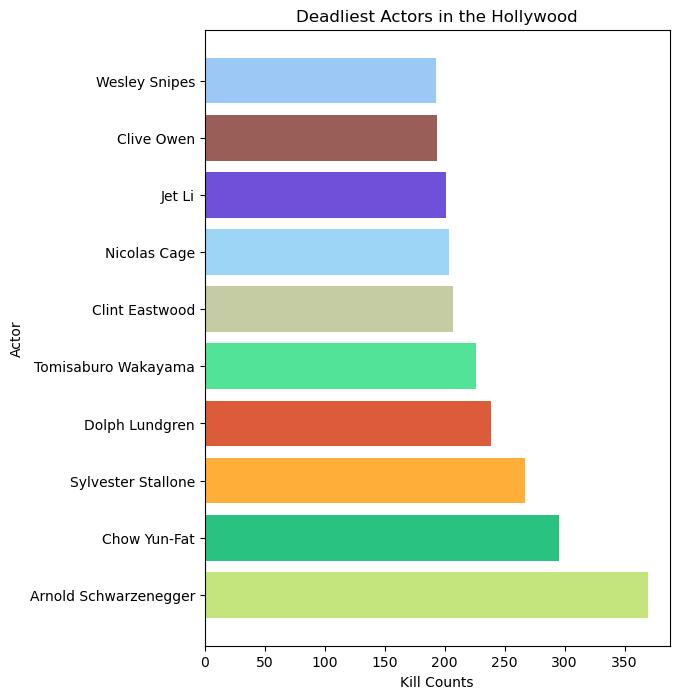

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')

data = data.sort_values(by='Count', ascending=False)

colours = ['#C4E57D','#2AC280','#FFAE39','#DC5B3B','#52E397','#C5CBA3','#9CD5F6','#6E50D9','#9A5E59','#9BC8F5','#0BBC66',
           '#FF3D52','#3B19CE','#25974F','#1EAD79','#375E4C','#43C711','#A4CCD9','#AFF373','#392D6A','#792D86','#9CA54B',
           '#7F03BE','#D5EC95','#FCE2A5']

fig, ax = plt.subplots(figsize=(6,8))
ax.barh(data['Actor'], data['Count'], color=colours)

ax.set_xlabel('Kill Counts')
ax.set_ylabel('Actor')
ax.set_title('Deadliest Actors in the Hollywood')

plt.show()


# Question 9
Create a pie chart showing the fraction of all Roman Emperors that were 
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the 
percentage breakdown of the categories.

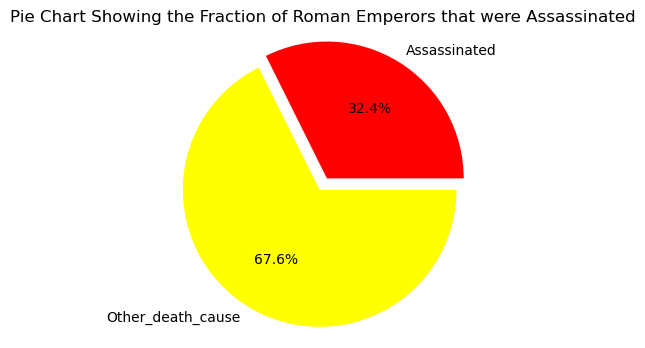

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

emperors_df4 = pd.read_csv('roman-emperor-reigns.csv')

assassinated_count = len(emperors_df4[emperors_df4['Cause_of_Death'] == 'Assassinated'])

total_count = len(emperors_df4)
assassinated_percent = assassinated_count / total_count * 100

labels = ['Assassinated', 'Other_death_cause']
sizes = [assassinated_percent, 100 - assassinated_percent]
explode = (0.1, 0)  
colors = ['#FF0000','#FFFF00']

fig, ax = plt.subplots(figsize=(4, 4))
ax.pie(sizes, colors=colors, explode=explode, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Pie Chart Showing the Fraction of Roman Emperors that were Assassinated')

plt.show()


# Question 10
Create a scatter plot showing the relationship between the total revenue earned by 
arcades and the number of Computer Science PhDs awarded in the U.S. between 
2000 and 2009.
Don't forget to label your axes! 
Color each dot according to its year.

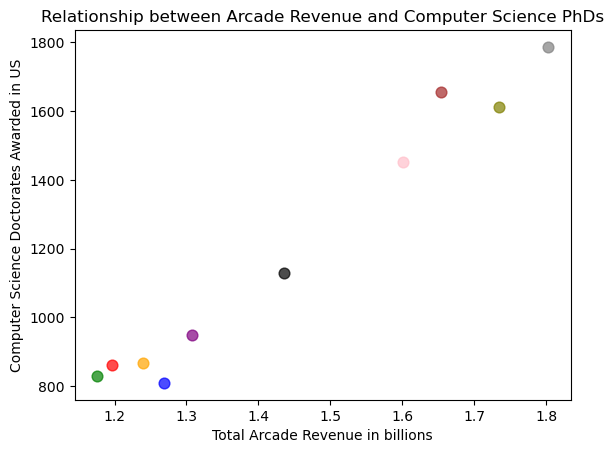

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

revenue_df = pd.read_csv("arcade-revenue-vs-cs-doctorates.csv")

year = revenue_df['Year']
revenue = revenue_df['Total Arcade Revenue (billions)']
phds = revenue_df['Computer Science Doctorates Awarded (US)']

colors = {2000: 'red', 2001: 'green', 2002: 'blue', 2003: 'orange', 2004: 'purple', 2005: 'black', 2006: 'pink', 2007: 'brown', 2008: 'gray', 2009: 'olive'}

fig, ax = plt.subplots()
for i in range(len(year)):
    ax.scatter(revenue[i], phds[i], color=colors[year[i]], s=60, alpha=0.7)

# Set the title and labels for the plot
ax.set_title("Relationship between Arcade Revenue and Computer Science PhDs")
ax.set_xlabel("Total Arcade Revenue in billions")
ax.set_ylabel("Computer Science Doctorates Awarded in US")

plt.show()
